<a href="https://colab.research.google.com/github/Donalizasaji/LAB/blob/main/AML_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Program_2_Dataset.csv')

In [ ]:
df.head()

Crime_Rate  Zone_proportion  Non_Retail_Acres  CHAS    NOX  Avg_rooms   \
0     0.06860              0.0              2.89     0  0.445       7.416   
1     0.14866              0.0              8.56     0  0.520       6.727   
2     0.11432              0.0              8.56     0  0.520       6.781   
3     0.22876              0.0              8.56     0  0.520       6.405   
4     0.21161              0.0              8.56     0  0.520       6.137   

    AGE  Distance  RAD  Property_TaxRate  PTRATIO       B  LSTAT  MValue  
0  62.5    3.4952    2               276     18.0  396.90   6.19    33.2  
1  79.9    2.7778    5               384     20.9  394.76   9.42    27.5  
2  71.3    2.8561    5               384     20.9  395.58   7.67    26.5  
3  85.4    2.7147    5               384     20.9   70.80  10.63    18.6  
4  87.4    2.7147    5               384     20.9  394.47  13.44    19.3

In [ ]:
df.tail()

Crime_Rate  Zone_proportion  Non_Retail_Acres  CHAS    NOX  Avg_rooms   \
501    12.80230              0.0              18.1     0  0.740       5.854   
502    10.67180              0.0              18.1     0  0.740       6.459   
503     6.28807              0.0              18.1     0  0.740       6.341   
504     9.92485              0.0              18.1     0  0.740       6.251   
505     9.32909              0.0              18.1     0  0.713       6.185   

      AGE  Distance  RAD  Property_TaxRate  PTRATIO       B  LSTAT  MValue  
501  96.6    1.8956   24               666     20.2  240.52  23.79    10.8  
502  94.8    1.9879   24               666     20.2   43.06  23.98    11.8  
503  96.4    2.0720   24               666     20.2  318.01  17.79    14.9  
504  96.6    2.1980   24               666     20.2  388.52  16.44    12.6  
505  98.7    2.2616   24               666     20.2  396.90  18.13    14.1

In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
print(df.columns)


Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


In [ ]:
# Select the predictors and target variable
X = df[['Avg_rooms ', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
y = df['MValue']


In [14]:
# Calculate VIF for each predictor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_factors = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [15]:
# Print VIF factors for each predictor
for i, vif in enumerate(vif_factors):
    print(f"VIF for {X.columns[i]}: {vif}")

VIF for Avg_rooms : 16.74796468070197
VIF for Distance: 6.880606903412825
VIF for Property_TaxRate: 13.861510476253434
VIF for Non_Retail_Acres: 9.598374007368621


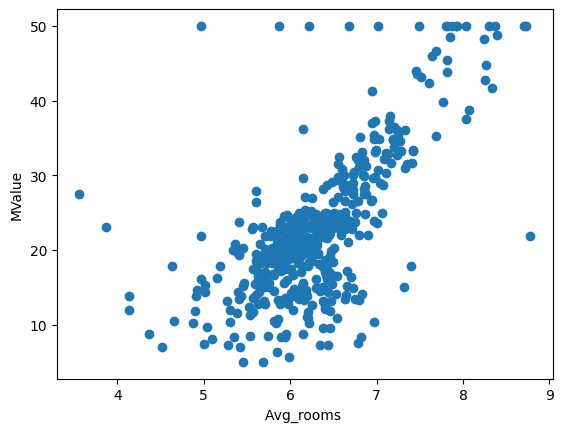

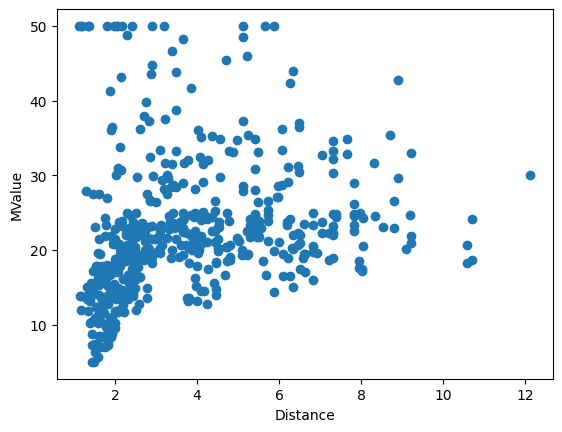

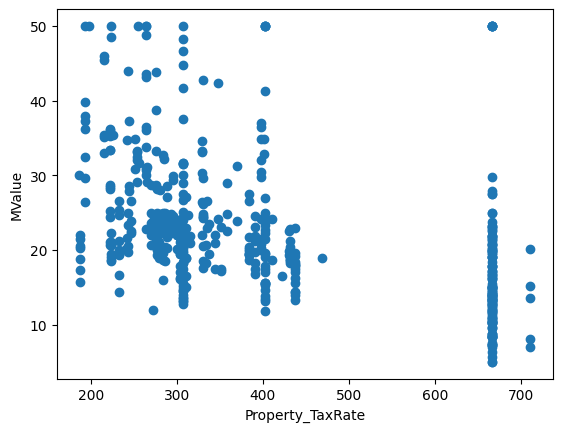

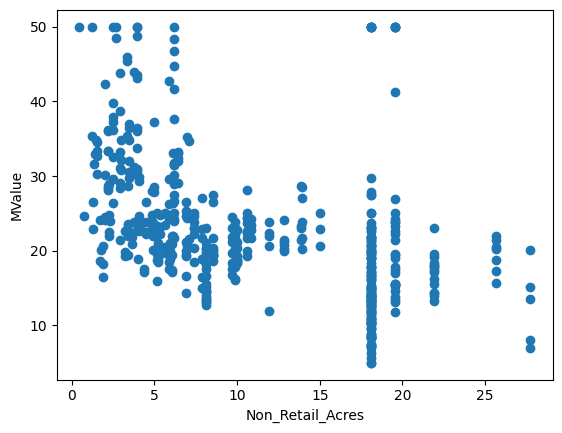

In [ ]:
# Create scatter plots for each predictor
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('MValue')
    plt.show()


In [ ]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 7.71823295 -0.65291673 -0.01373718 -0.21258162]
Intercept: -15.332210810746496


In [16]:
# Evaluate the model on the training data
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate the model on the testing data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print('Mean Squared Error (Training):', mse_train)
print('R-squared (Training):', r2_train)
print('Mean Squared Error (Testing):', mse_test)
print('R-squared (Testing):', r2_test)

Mean Squared Error (Training): 40.83615624350907
R-squared (Training): 0.552374742371587
Mean Squared Error (Testing): 27.569771797553905
R-squared (Testing): 0.60781481718806


In [17]:
# Calculate adjusted R-squared for train set
n = X_train.shape[0]  # Number of observations
p = X_train.shape[1]  # Number of predictors
adj_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for test set
n_test = X_test.shape[0]  # Number of test observations
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

In [18]:
results = pd.DataFrame({
    'Adjusted R-squared': [adj_r2_train, adj_r2_test],
}, index=['Train', 'Test'])

print(results)

       Adjusted R-squared
Train            0.547014
Test             0.598131


Inference:
The regression model displays moderate predictive capability, with R-squared values of around 0.55 for the training data and 0.61 for the testing data. However, the high Variance Inflation Factor (VIF) values signal multicollinearity among the independent variables, potentially compromising the model's accuracy. Addressing multicollinearity through feature selection methods could enhance the model's predictive reliability



